In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
df = pd.read_csv('/drive/My Drive/NLP Project/yelp.csv')

In [5]:
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [6]:
df.shape

(10000, 10)

In [7]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
#Number of words in text(reviews) column
df['text_length']=df['text'].apply(len)

In [9]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [10]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text_length'],
      dtype='object')

In [11]:
col=['text_length','stars','cool','useful','funny']
for i in col:
    print(i,df[i].unique(),'\n')

text_length [ 889 1345   76 ... 2619 1950 2918] 

stars [5 4 2 3 1] 

cool [ 2  0  1  4  7  3  5 11  6  8 16 28 12 13 10 22 17 18  9 14 21 15 19 20
 23 77 27 38 32] 

useful [ 5  0  1  2  3  7  4  6 16  9 17 19 28  8 15 10 12 23 20 11 13 18 14 24
 76 31 38 30] 

funny [ 0  1  4  2  3  8  9  6  5 39  7 12 16 20 27 11 13 17 10 30 22 14 19 18
 23 21 15 24 57] 



In [12]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
text_length    0
dtype: int64

#EDA

In [13]:
df[['stars','text']].groupby('stars').describe()

text                                                               
      count unique                                                top freq
stars                                                                     
1       749    749  U can go there n check the car out. If u wanna...    1
2       927    926  This review is for the chain in general. The l...    2
3      1461   1461  We went here on a Saturday afternoon and this ...    1
4      3526   3526  love the gyro plate. Rice is so good and I als...    1
5      3337   3336                                      Great service    2

<Axes: ylabel='Frequency'>

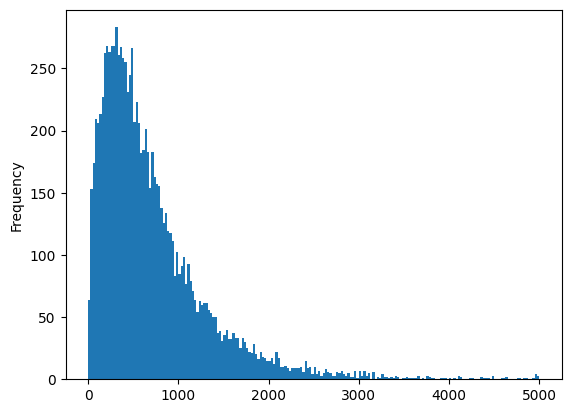

In [14]:
df['text_length'].plot.hist(bins=200)

In [15]:
#df.hist(column='text_length',by='stars',figsize=(12,12))

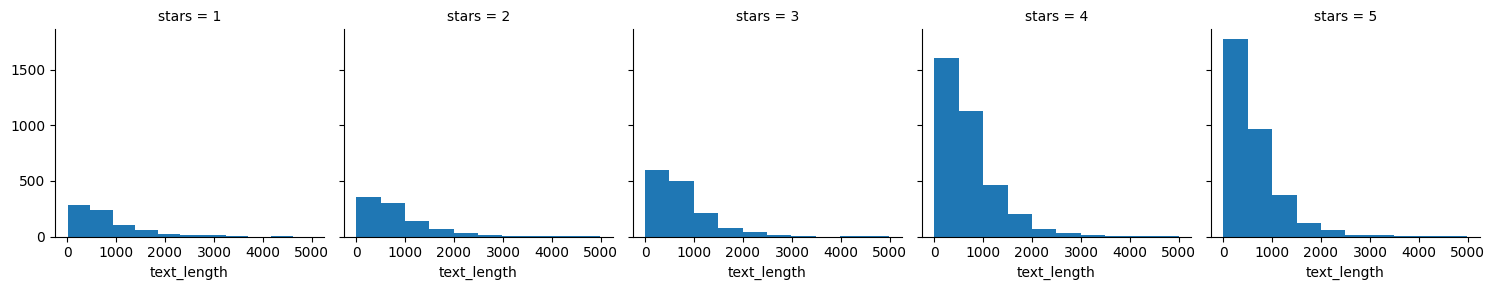

In [16]:
text_stars=sns.FacetGrid(df,col='stars')
text_stars.map(plt.hist,'text_length')

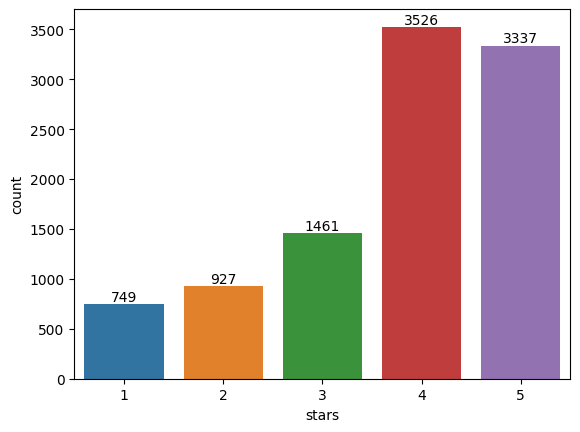

In [17]:
star_count=sns.countplot(x='stars',data=df)
labels = star_count.bar_label(star_count.containers[0])
plt.show()

In [18]:
sta=df.groupby('stars').mean()
sta

<ipython-input-18-f4354aeadc0f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sta=df.groupby('stars').mean()


,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [19]:
sta.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

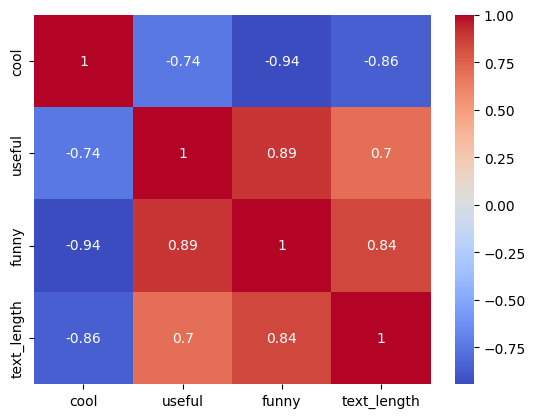

In [20]:
sns.heatmap(sta.corr(),cmap='coolwarm',annot=True)

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
#convert into lowercase before tokenizing(splitting) data
df["text"]=df["text"].astype(str).str.lower()

In [23]:
from nltk.tokenize import RegexpTokenizer
regexp=RegexpTokenizer('\w+')

In [24]:
#tokenize text column for further procedure
df["text_tokenized"]=df["text"].apply(regexp.tokenize)
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,text_tokenized
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,"[my, wife, took, me, here, on, my, birthday, f..."


In [25]:
import os
from nltk.corpus import stopwords


In [26]:
stop_words = set(stopwords.words('english')) 

In [27]:
print(stop_words)

{'were', "don't", 'some', 'most', 'that', 'while', 'it', 'of', 'needn', 'any', 'here', 'who', "weren't", 'be', 're', 'these', 'myself', 'out', "hasn't", 'down', 'hasn', 'ourselves', 'was', 'to', 'between', 'my', "she's", 'now', 'should', 'y', 'doesn', 'through', 'above', 'under', 'how', 'very', "it's", 'his', 'him', 'isn', 'll', 'we', "you're", 'this', 'where', 'being', 'shouldn', 'against', "didn't", "that'll", 'you', 'so', 'doing', 'before', 'further', 'all', 'are', 'them', 'same', 'wouldn', 'aren', 'can', 'on', 'then', 'a', 'himself', 'don', 'ours', 'itself', 'been', 'didn', "wouldn't", 'own', 'over', 'when', 'just', "you'll", 'off', 'for', 'from', 'why', 'd', 't', 'if', 'weren', 'shan', 'i', 'yourself', "needn't", "should've", 'they', "you've", 'once', 'there', 'what', 'hadn', 'more', 'an', 'after', "wasn't", 'into', 'too', 'the', 'with', 'having', "haven't", 'she', 'not', 'he', 'am', 's', 'our', 'me', 'such', 'ma', 'does', "couldn't", 'below', 'about', 'yours', "shan't", 'her', 'm

In [28]:
#removing stop words from tokenized text column
df['text_tokenized_clean']=df['text_tokenized'].apply(lambda x:[item for item in x if item not in stop_words])


In [29]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,text_tokenized,text_tokenized_clean
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,"[my, wife, took, me, here, on, my, birthday, f...","[wife, took, birthday, breakfast, excellent, w..."


In [30]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [33]:
# Create list of positive words in text column
positive_words_text = []
for row in df['text_tokenized_clean']:
    row_words = []
    for element in row:
        words = word_tokenize(str(element).lower())
        positive_words_in_element = [word for word in words if word in positive_words]
        row_words.extend(positive_words_in_element)
    positive_words_text.append(row_words)

print(positive_words_text)

[['excellent', 'perfect', 'pleasure', 'excellent', 'like', 'pretty', 'better', 'favor', 'phenomenal', 'best', 'pretty', 'fresh', 'amazing', 'excellent', 'delicious', 'amazing', 'best'], ['like', 'pretty', 'pleasant', 'good', 'well', 'awesome', 'liked', 'better', 'liked', 'better', 'like', 'great', 'like'], ['love', 'good'], ['love', 'convenient', 'wonderful', 'clean'], ['good', 'assure', 'respect', 'satisfied', 'like', 'recover', 'important', 'awesome'], ['beautiful', 'warmth', 'fairly', 'impressed', 'enough', 'crisp', 'fresh', 'good', 'liked', 'good', 'warm', 'wonder', 'solid', 'innovation', 'delicious', 'tough', 'winner', 'like'], ['good', 'cute', 'grand', 'joy', 'easy', 'cleanliness', 'awesome', 'loved', 'variety', 'delicious', 'delight', 'excited', 'hot', 'hot', 'delicious', 'bonus', 'good', 'enough', 'win', 'amazing', 'great', 'love'], ['thank', 'pleasant', 'grace'], ['happy', 'amazing', 'great', 'incredibly', 'nice', 'right'], ['talents'], ['sweet', 'super', 'marvelous'], ['wonde

In [34]:
#inserting all positive words from text in new column
df["positive_words_text"]=positive_words_text

In [35]:
negative_words_text = []

for row in df['text_tokenized_clean']:
    row_words = []
    for element in row:
        words = word_tokenize(str(element).lower())
        negative_words_in_element = [word for word in words if word in negative_words]
        row_words.extend(negative_words_in_element)
    negative_words_text.append(row_words)

print(negative_words_text)

[['bloody', 'scrambled'], ['bad', 'fault', 'crowded', 'bad', 'bad', 'issues'], [], ['desert', 'trash'], ['issues', 'mistakes', 'inevitable'], ['disappoint', 'bothered', 'unhappy', 'problem', 'troubles', 'spotty'], ['desolate', 'smell', 'difficult', 'shark', 'stole', 'snagged', 'sucker'], [], ['crowded'], [], ['cheap'], [], ['limited'], ['dick'], ['cold'], ['bad', 'died', 'mad', 'mad', 'overpriced', 'desperate'], ['bloody', 'bloody', 'arrogant', 'bastard', 'hesitant', 'damn', 'disappointed', 'bad', 'anxiously'], ['shock'], ['dark', 'sour', 'lemon', 'stew'], ['trouble', 'suck', 'disappointed'], ['mashed'], [], [], ['wrong', 'mistake', 'ripped', 'lying', 'bad', 'problem', 'worst', 'trashy'], [], ['difficult', 'brittle'], ['skeptical', 'disappointed', 'mistake', 'clumsy'], ['dim'], ['pricey'], ['bitch'], ['sucker', 'hang'], ['disgusting', 'gaudy', 'bad'], ['unfortunately', 'bad', 'sorry'], [], ['cheap', 'scramble'], ['bad', 'horrible', 'fat', 'blah', 'bad', 'fat'], ['dark'], [], ['bland'],

In [36]:
df["negative_words_text"]=negative_words_text

In [37]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,text_tokenized,text_tokenized_clean,positive_words_text,negative_words_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,"[my, wife, took, me, here, on, my, birthday, f...","[wife, took, birthday, breakfast, excellent, w...","[excellent, perfect, pleasure, excellent, like...","[bloody, scrambled]"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,"[i, have, no, idea, why, some, people, give, b...","[idea, people, give, bad, reviews, place, goes...","[like, pretty, pleasant, good, well, awesome, ...","[bad, fault, crowded, bad, bad, issues]"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. rice is so good and i als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,"[love, the, gyro, plate, rice, is, so, good, a...","[love, gyro, plate, rice, good, also, dig, can...","[love, good]",[]
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"rosie, dakota, and i love chaparral dog park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,"[rosie, dakota, and, i, love, chaparral, dog, ...","[rosie, dakota, love, chaparral, dog, park, co...","[love, convenient, wonderful, clean]","[desert, trash]"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,"[general, manager, scott, petello, is, a, good...","[general, manager, scott, petello, good, egg, ...","[good, assure, respect, satisfied, like, recov...","[issues, mistakes, inevitable]"


In [38]:
#Function to calculate length of a list
def l_length(a):
    return len(a)

In [39]:
# Add new column containing count of required words in article
df['text_words_count'] = df['text_tokenized_clean'].apply(l_length)
df['count_positive_words'] = df['positive_words_text'].apply(l_length)
df['count_negative_words'] = df['negative_words_text'].apply(l_length)

In [40]:
df['Polarity_Score'] = (df['count_positive_words'] - df['count_negative_words'])/ ((df['count_positive_words'] + df['count_negative_words']) + 0.000001)
df['Polarity_Score']

0       0.789474
1       0.368421
2       1.000000
3       0.333333
4       0.454545
          ...   
9995    0.428571
9996    0.375000
9997    0.454545
9998    0.076923
9999    1.000000
Name: Polarity_Score, Length: 10000, dtype: float64

In [41]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,text_tokenized,text_tokenized_clean,positive_words_text,negative_words_text,text_words_count,count_positive_words,count_negative_words,Polarity_Score
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,"[my, wife, took, me, here, on, my, birthday, f...","[wife, took, birthday, breakfast, excellent, w...","[excellent, perfect, pleasure, excellent, like...","[bloody, scrambled]",78,17,2,0.789474


In [42]:
star_count=df.groupby(['stars']).agg({'count_positive_words': 'sum', 'count_negative_words': 'sum','Polarity_Score':'mean'})

In [43]:
#we can compare the ratio of positive words is more for 5 stars comparatively than 1 star
star_count

,count_positive_words,count_negative_words,Polarity_Score
stars,,,
1,3586,3961,-0.111016
2,5987,4119,0.194072
3,10954,4577,0.435113
4,29613,8138,0.619131
5,26131,5880,0.676549


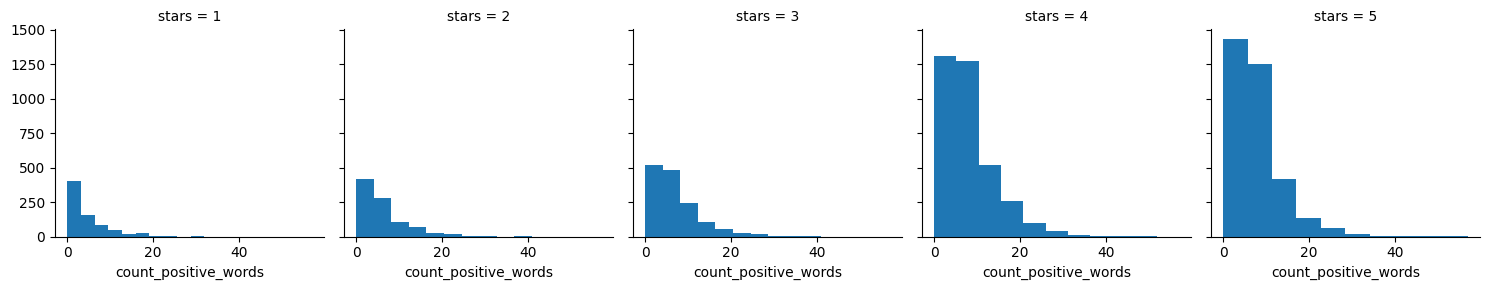

In [44]:
#we can see the variation of count of positive words for various stars
ptext_stars=sns.FacetGrid(df,col='stars')
ptext_stars.map(plt.hist,'count_positive_words')

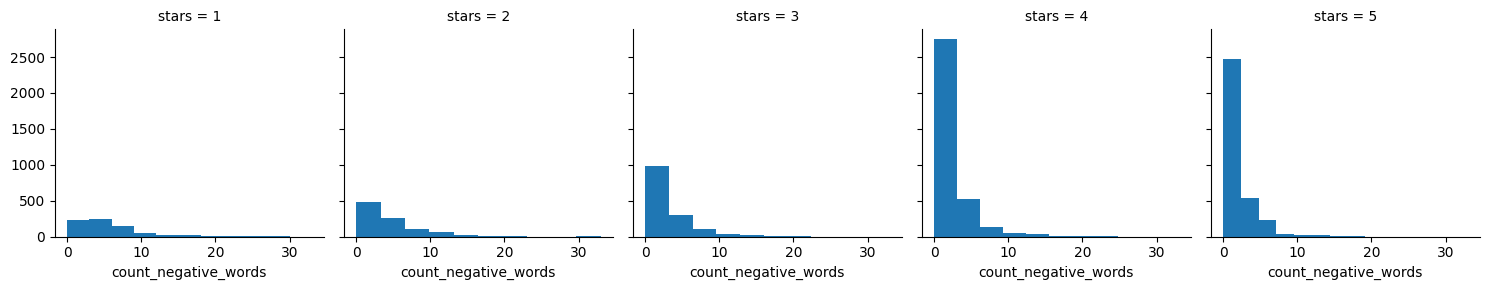

In [45]:
ntext_stars=sns.FacetGrid(df,col='stars')
ntext_stars.map(plt.hist,'count_negative_words')

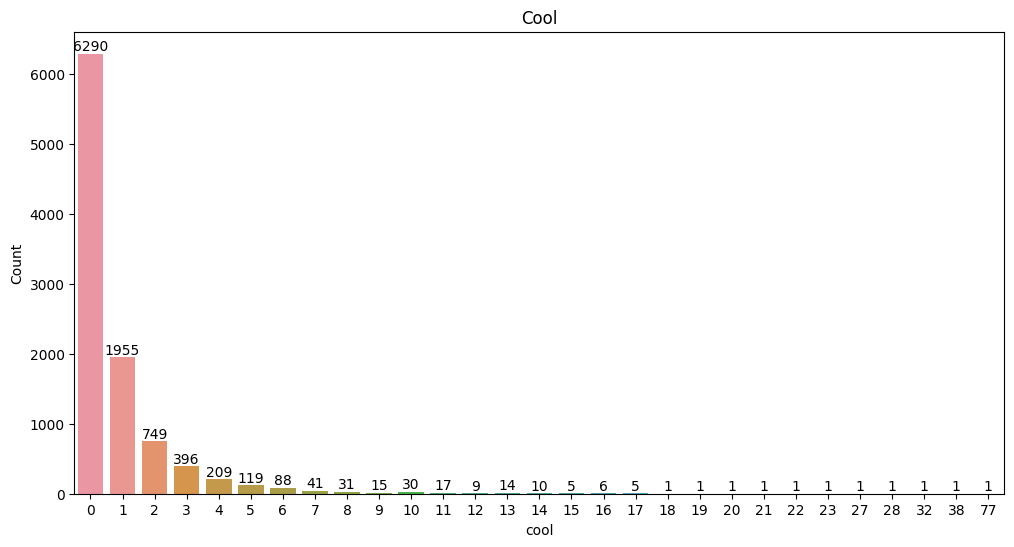

In [46]:
plt.figure(figsize=(12,6))
cool_count=sns.countplot(x='cool', data=df)
cool_count.set_title('Cool')
cool_count.set_ylabel('Count')
labels = cool_count.bar_label(cool_count.containers[0])

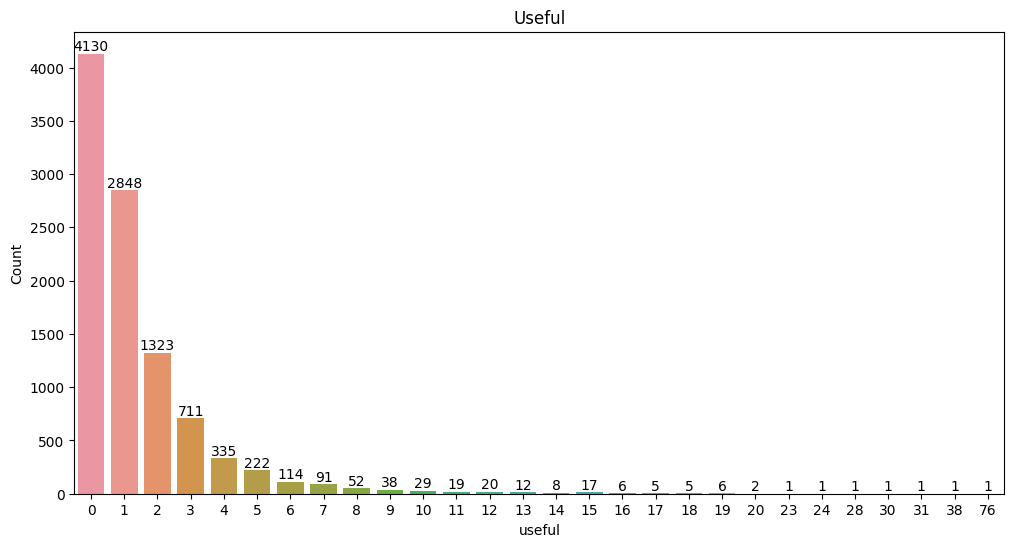

In [47]:
plt.figure(figsize=(12,6))
useful_count=sns.countplot(x='useful', data=df)
useful_count.set_title('Useful')
useful_count.set_ylabel('Count')
labels = useful_count.bar_label(useful_count.containers[0])

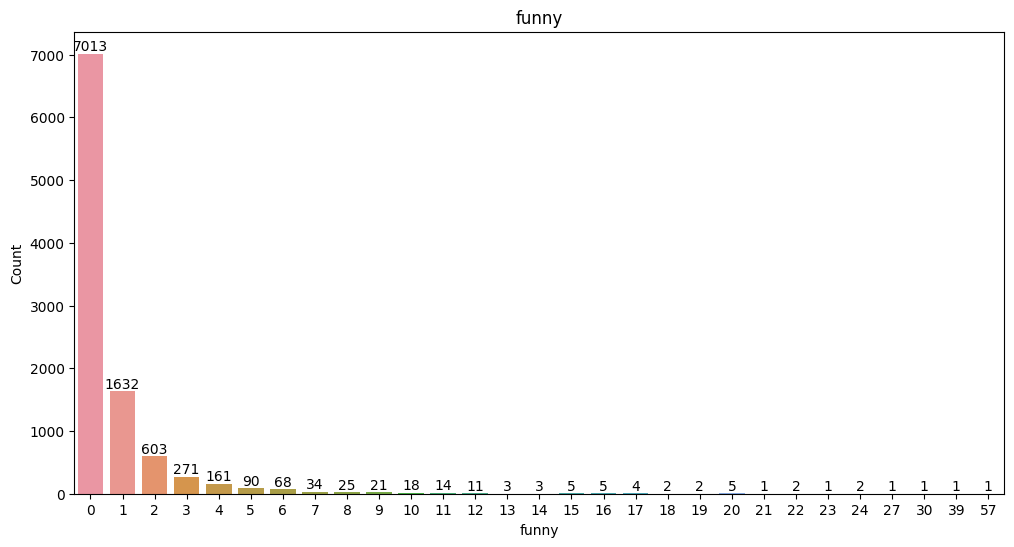

In [48]:
plt.figure(figsize=(12,6))
funny_count=sns.countplot(x='funny', data=df)
funny_count.set_title('funny')
funny_count.set_ylabel('Count')
labels = funny_count.bar_label(funny_count.containers[0])

In [49]:
#NLP classification
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

#Text Analysis

In [50]:
from nltk.probability import FreqDist
from wordcloud import WordCloud

#1 to 5 Stars word frequency

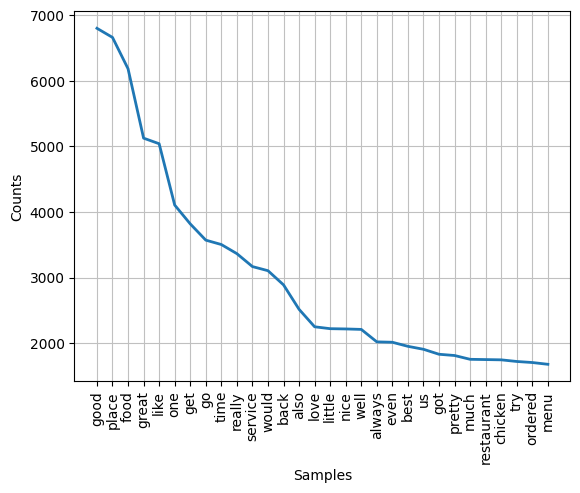

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
words_split = []
for i in range(0,9999): 
    for word in df['text_tokenized_clean'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

#1 to 5 Stars Negative word frequency

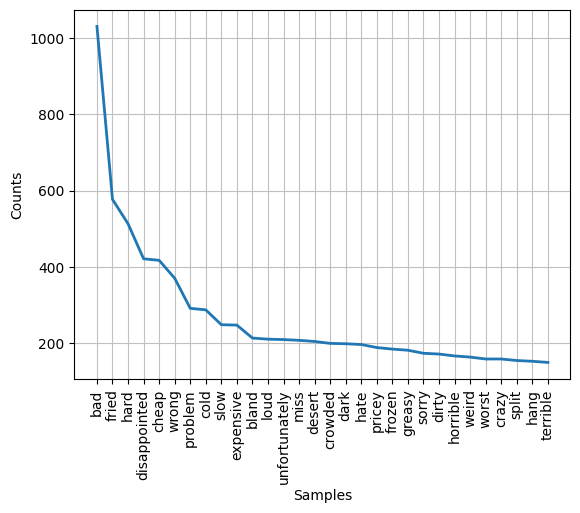

<Axes: xlabel='Samples', ylabel='Counts'>

In [52]:
words_split_negative = []
for i in range(0,9999): 
    for word in df['negative_words_text'][i]:
        words_split_negative.append(word)
FreqDist(words_split_negative).plot(30, cumulative=False)

#1 to 5 Stars Positive word frequency

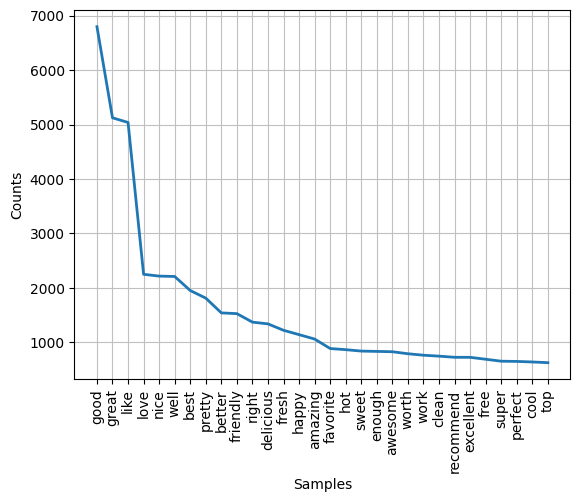

<Axes: xlabel='Samples', ylabel='Counts'>

In [53]:
words_split_positive = []
for i in range(0,9999): 
    for word in df['positive_words_text'][i]:
        words_split_positive.append(word)
FreqDist(words_split_positive).plot(30, cumulative=False)

ML without TF_IDF

In [54]:
df1 = df

In [55]:
X = df1['text']
y = df1['stars']

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X = cv.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [60]:
#Training a Model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [61]:
nb.fit(X_train,y_train)

MultinomialNB()

In [62]:
#Prediction and Evaluations

predictions = nb.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



#Using TF-IDF

In [65]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [66]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [67]:
X = df1['text']
y = df1['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [68]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [69]:
#Prediction
predictions = pipeline.predict(X_test)

In [70]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

    accuracy                           0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [83]:
X = df1['text']
y = df1['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [84]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [85]:
predictions = pipeline.predict(X_test)

In [86]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 14   2   1 120  83]
 [  2   2   3 211  55]
 [  0   1   4 351  87]
 [  0   0   4 726 334]
 [  1   0   0 396 603]]
              precision    recall  f1-score   support

           1       0.82      0.06      0.12       220
           2       0.40      0.01      0.01       273
           3       0.33      0.01      0.02       443
           4       0.40      0.68      0.51      1064
           5       0.52      0.60      0.56      1000

    accuracy                           0.45      3000
   macro avg       0.50      0.27      0.24      3000
weighted avg       0.46      0.45      0.38      3000



Looks like Tf-Idf actually made things worse

#For Stars 1 and 5

In [71]:
df2 = df[(df.stars==1) | (df.stars==5)]

In [72]:
X = df2['text']
y = df2['stars']

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [74]:
X = cv.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [77]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [78]:
nb.fit(X_train,y_train)

MultinomialNB()

In [79]:
predictions = nb.predict(X_test)

In [80]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



#As we can can observe we can predict highest and lowest levels with high accuracy. Which means we can focus on these two levels and summarize what Yelp should know when it gets highest stars and what it should improve when it gets lowest star.